In [2]:
#
# Load the H2O Python module.

import h2o

h2o.init()

# ### Start H2O

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
#help(H2ODeepLearningEstimator)
#help(h2o.import_file)

get_ipython().magic(u'matplotlib inline')
#IMPORT ALL THE THINGS

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class_df = h2o.import_file("Data_Glioblatoma5Patients_SC.csv")

#split the data as described above
train, valid, test = class_df.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
class_X = class_df.col_names[:-1]     #last column is varibale to estimate,
class_y = class_df.col_names[-1]

# Encode the response column as categorical for multinomial classification
#train[class_y] = train[class_y].asfactor()
#test[class_y] = test[class_y].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 hour 5 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_pengzhi_pq3aaf
H2O cluster total nodes:,1
H2O cluster free memory:,2.614 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
asf = train[class_y].asfactor


In [2]:
model = H2ODeepLearningEstimator(
   distribution="multinomial",
   activation="rectifier",
   loss = "cross entropy",
   stopping_metric="misclassification", ## alternatives: "MSE","logloss","r2"
   mini_batch_size=20,
   hidden=[250,250,250],                      ## for better generalization
   input_dropout_ratio=0.2,
   nfolds=3,                               
   epochs=1000,                            ## need more epochs for a better model
   variable_importances=True,
   standardize = True) 

In [9]:
help(asf)

Help on method asfactor in module h2o.frame:

asfactor() method of h2o.frame.H2OFrame instance
    Convert columns in the current frame to categoricals.
    
    :returns: new H2OFrame with columns of the "enum" type.



In [3]:
model.train(class_X, class_y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_848fce85dd2433dd7514a618c95446c8> was cancelled by the user.

In [5]:
model.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_classification_error
0,,2019-01-09 17:05:38,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-01-09 17:05:42,1 min 51.396 sec,399 obs/sec,5.533582,1,1483.0,1.201263e-01,1.449015e-01,0.993077,0.014925,0.290940,0.896901,0.961566,0.084337
2,,2019-01-09 17:06:08,2 min 17.692 sec,376 obs/sec,39.014925,7,10456.0,3.201911e-11,3.922441e-12,1.000000,0.000000,0.144725,0.180669,0.990490,0.024096


In [6]:
model.model_performance(train=True) # training metrics


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 1.0252230956580926e-21
RMSE: 3.2019105166417324e-11
LogLoss: 3.922441145203357e-12
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Classes,P1,P2,P3,P4,P5,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,73.0,0.0,0.0,0.0,0.0,0.0,0 / 73
0.0,0.0,62.0,0.0,0.0,0.0,0.0,0 / 62
0.0,0.0,0.0,41.0,0.0,0.0,0.0,0 / 41
0.0,0.0,0.0,0.0,48.0,0.0,0.0,0 / 48
0.0,0.0,0.0,0.0,0.0,44.0,0.0,0 / 44
0.0,73.0,62.0,41.0,48.0,44.0,0.0,0 / 268


Top-6 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [7]:
model.model_performance(valid=True) # validation metrics


ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.02094519433907803
RMSE: 0.14472454642899396
LogLoss: 0.1806693095926425
Mean Per-Class Error: 0.17592592592592593
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Classes,P1,P2,P3,P4,P5,Error,Rate
0.0,0.0,1.0,0.0,0.0,0.0,1.0,1 / 1
0.0,20.0,0.0,0.0,0.0,0.0,0.0,0 / 20
0.0,0.0,14.0,0.0,0.0,0.0,0.0,0 / 14
0.0,0.0,0.0,17.0,0.0,1.0,0.0555556,1 / 18
0.0,0.0,0.0,0.0,13.0,0.0,0.0,0 / 13
0.0,0.0,0.0,0.0,0.0,17.0,0.0,0 / 17
0.0,20.0,15.0,17.0,13.0,18.0,0.0240964,2 / 83


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9759036
2,0.9879518
3,0.9879518
4,0.9879518
5,0.9879518
6,1.0


In [8]:
model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1547074949244_1


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 1.0252230956580926e-21
RMSE: 3.2019105166417324e-11
LogLoss: 3.922441145203357e-12
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Classes,P1,P2,P3,P4,P5,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,73.0,0.0,0.0,0.0,0.0,0.0,0 / 73
0.0,0.0,62.0,0.0,0.0,0.0,0.0,0 / 62
0.0,0.0,0.0,41.0,0.0,0.0,0.0,0 / 41
0.0,0.0,0.0,0.0,48.0,0.0,0.0,0 / 48
0.0,0.0,0.0,0.0,0.0,44.0,0.0,0 / 44
0.0,73.0,62.0,41.0,48.0,44.0,0.0,0 / 268


Top-6 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.02094519433907803
RMSE: 0.14472454642899396
LogLoss: 0.1806693095926425
Mean Per-Class Error: 0.17592592592592593
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Classes,P1,P2,P3,P4,P5,Error,Rate
0.0,0.0,1.0,0.0,0.0,0.0,1.0,1 / 1
0.0,20.0,0.0,0.0,0.0,0.0,0.0,0 / 20
0.0,0.0,14.0,0.0,0.0,0.0,0.0,0 / 14
0.0,0.0,0.0,17.0,0.0,1.0,0.0555556,1 / 18
0.0,0.0,0.0,0.0,13.0,0.0,0.0,0 / 13
0.0,0.0,0.0,0.0,0.0,17.0,0.0,0 / 17
0.0,20.0,15.0,17.0,13.0,18.0,0.0240964,2 / 83


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9759036
2,0.9879518
3,0.9879518
4,0.9879518
5,0.9879518
6,1.0



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.07832565059257811
RMSE: 0.2798672017092716
LogLoss: 1.3797019484897224
Mean Per-Class Error: 0.07366766889659014
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Classes,P1,P2,P3,P4,P5,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,68.0,2.0,0.0,2.0,1.0,0.0684932,5 / 73
0.0,2.0,57.0,1.0,2.0,0.0,0.0806452,5 / 62
0.0,0.0,2.0,38.0,0.0,1.0,0.0731707,3 / 41
0.0,0.0,1.0,0.0,44.0,3.0,0.0833333,4 / 48
0.0,3.0,2.0,1.0,0.0,38.0,0.1363636,6 / 44
0.0,73.0,64.0,40.0,48.0,43.0,0.0858209,23 / 268


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9141791
2,0.9701492
3,0.9813433
4,0.9813433
5,0.9813433
6,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
accuracy,0.9127148,0.0130728,0.9052632,0.9381443,0.8947368
err,0.0872852,0.0130728,0.0947368,0.0618557,0.1052632
err_count,7.6666665,0.8819171,9.0,6.0,8.0
logloss,1.3257558,0.4846160,2.2183278,1.2066462,0.5522934
max_per_class_error,0.1719298,0.0140351,0.1578947,0.1578947,0.2
mean_per_class_accuracy,0.930355,0.0098462,0.9273035,0.9487288,0.9150327
mean_per_class_error,0.0696450,0.0098462,0.0726965,0.0512712,0.0849673
mse,0.0792628,0.0119213,0.0923528,0.0554598,0.0899759
r2,0.961007,0.0069025,0.9522468,0.974627,0.9561471
rmse,0.2797849,0.0221721,0.3038960,0.2354989,0.2999598


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_classification_error
,2019-01-09 17:05:38,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2019-01-09 17:05:42,1 min 51.396 sec,399 obs/sec,5.5335821,1,1483.0,0.1201263,0.1449015,0.9930775,0.0149254,0.2909397,0.8969006,0.9615657,0.0843373
,2019-01-09 17:06:08,2 min 17.692 sec,376 obs/sec,39.0149254,7,10456.0,0.0000000,0.0000000,1.0,0.0,0.1447245,0.1806693,0.9904896,0.0240964


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C360,1.0,1.0,0.0002023
C1424,0.9611741,0.9611741,0.0001944
C4052,0.9544314,0.9544314,0.0001930
C5538,0.9495937,0.9495937,0.0001921
C5656,0.9465604,0.9465604,0.0001914
---,---,---,---
C632,0.7267972,0.7267972,0.0001470
C2992,0.7256934,0.7256934,0.0001468
C5234,0.7243809,0.7243809,0.0001465
C814,0.7115451,0.7115451,0.0001439



See the whole table with table.as_data_frame()


In [9]:
model.mean_per_class_error(valid=True)

0.17592592592592593

In [10]:
predictions = model.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [11]:
predictions

predict,Classes,P1,P2,P3,P4,P5
P1,1.03105e-29,1,6.34716e-26,2.31436e-29,2.42218e-27,1.43673e-31
P1,9.3911e-27,1,5.28586e-20,2.30802e-27,3.37536e-24,2.21197e-35
P1,6.3639e-22,1,4.90227e-17,1.72168e-19,7.38682e-17,8.31516e-30
P1,1.12714e-28,1,7.90702e-24,2.0057e-25,2.88108e-26,2.20726e-38
P1,1.69473e-25,1,1.05869e-18,3.34312e-21,2.25639e-23,3.65427e-34
P1,2.4069e-20,1,4.09883e-18,4.65102e-21,2.91446e-23,5.22838e-29
P1,2.78424e-27,1,1.46125e-23,6.57495e-28,2.62562e-26,5.28845e-29
P1,8.44391e-29,1,2.09852e-23,2.59252e-29,1.42203e-28,5.32343e-34
P1,2.82716e-27,1,6.35261e-21,1.96676e-24,7.59672e-21,2.02099e-32
P1,2.05442e-26,1,1.96761e-21,7.81534e-23,1.2807e-19,1.65019e-33


In [12]:
predictions.describe()

Rows:80
Cols:7




,predict,Classes,P1,P2,P3,P4,P5
type,enum,real,real,real,real,real,real
mins,,1.0310543569965913e-29,3.345745604494222e-33,1.2723506482838602e-28,8.02479615871683e-34,1.6855280213618353e-41,2.0789324471465207e-40
mean,,3.013597599868154e-11,0.31250760188016313,0.22508418736331443,0.20758978691445576,0.14240319788269787,0.11241522592923284
maxs,,9.728394679929631e-10,1.0,1.0,1.0,1.0,1.0
sigma,,1.5443534336233976e-10,0.4664316503471996,0.42017064589944986,0.40439974398063333,0.34730799739823376,0.3177354084408491
zeros,,0,0,0,0,0,0
missing,0,0,0,0,0,0,0
0,P1,1.0310543569965913e-29,1.0,6.347163040803581e-26,2.3143550288830686e-29,2.4221825420562227e-27,1.4367346094769525e-31
1,P1,9.391098397711049e-27,1.0,5.285862415100673e-20,2.308021360394548e-27,3.37535597751006e-24,2.211974292501531e-35
2,P1,6.363899484218002e-22,1.0,4.902265904999326e-17,1.7216785059407054e-19,7.386821074786707e-17,8.3151572953653e-30


In [13]:
# Retrieve the variable importance
import pandas as pd
pd.DataFrame(model.varimp())

,0,1,2,3
0,C360,1.000000,1.000000,0.000202
1,C1424,0.961174,0.961174,0.000194
2,C4052,0.954431,0.954431,0.000193
3,C5538,0.949594,0.949594,0.000192
4,C5656,0.946560,0.946560,0.000191
5,C5813,0.944403,0.944403,0.000191
6,C1853,0.941234,0.941234,0.000190
7,C2570,0.935073,0.935073,0.000189
8,C2850,0.934363,0.934363,0.000189
9,C977,0.934269,0.934269,0.000189


In [14]:
var_df = pd.DataFrame(model.varimp(),
             columns=["Variable", "Relative Importance", "Scaled Importance", "Percentage"])
print (var_df.shape)
var_df.head(10)

(5948, 4)


,Variable,Relative Importance,Scaled Importance,Percentage
0,C360,1.000000,1.000000,0.000202
1,C1424,0.961174,0.961174,0.000194
2,C4052,0.954431,0.954431,0.000193
3,C5538,0.949594,0.949594,0.000192
4,C5656,0.946560,0.946560,0.000191
5,C5813,0.944403,0.944403,0.000191
6,C1853,0.941234,0.941234,0.000190
7,C2570,0.935073,0.935073,0.000189
8,C2850,0.934363,0.934363,0.000189
9,C977,0.934269,0.934269,0.000189


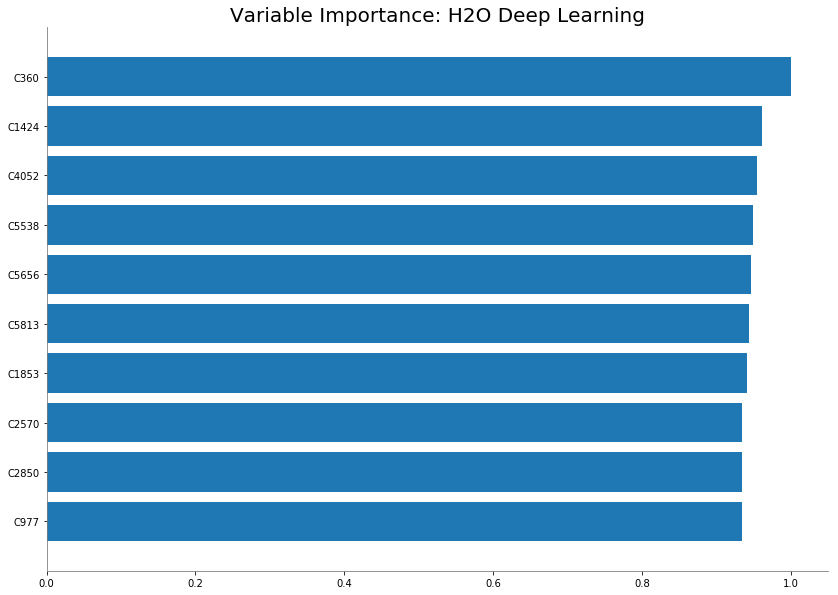

In [15]:
model.varimp_plot(num_of_features=10)

In [16]:
#pred = model.predict(test[0:-1]).as_data_frame(use_pandas=True)
#t=test.as_data_frame(use_pandas=True)
#test_actual = test.as_data_frame(use_pandas=True)['C5949']
#(test_actual == pred['predict']).mean()


#for key,value in t.iteritems():
#    test_actual = test.as_data_frame(use_pandas=True)[key]
#    print (key,(test_actual == pred['predict']).mean())

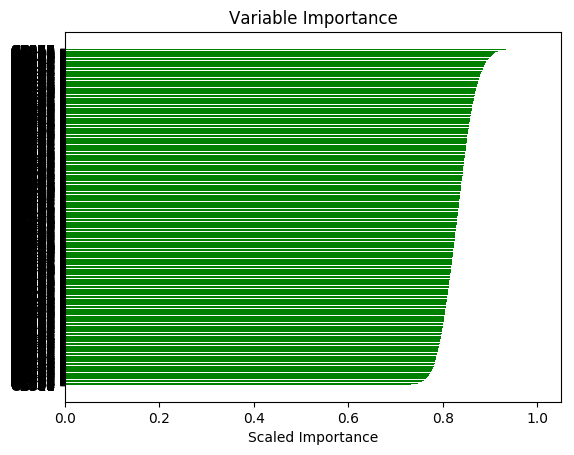

In [17]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()